# Proyecto Sprint 4 - Luis Gutiérrez | DA_32

# Limpieza inicial

## Inicio de código

In [1]:
#Importar librerías

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Importar datasets

df_instacarts = pd.read_csv('/Users/luisdgr/Desktop/Proyecto 4/instacart_orders.csv', sep=';')
df_aisles = pd.read_csv('/Users/luisdgr/Desktop/Proyecto 4/aisles.csv', sep=';')
df_dpts = pd.read_csv('/Users/luisdgr/Desktop/Proyecto 4/departments.csv', sep=';')
df_orders = pd.read_csv('/Users/luisdgr/Desktop/Proyecto 4/order_products.csv', sep=';')
df_products = pd.read_csv('/Users/luisdgr/Desktop/Proyecto 4/products.csv', sep=';')

## Info de cada dataset | Instacarts (app de pedidos)

In [3]:
df_instacarts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


### Cambios sugeridos

- Entiendo que si days_since_prior_order es null, quiere decir que se hizo el mismo día el pedido. Cambiaría los valores de null a 0, para no tener valores nulos.
- Cambiaría el days_since_prior_order a int, ya que no sirve de nada el decimal ahí.
- Verificaría duplicados y los quitaría.


In [4]:
df_instacarts['days_since_prior_order'] = df_instacarts['days_since_prior_order'].fillna(0) # Cambiar null a 0
df_instacarts['days_since_prior_order'] = df_instacarts['days_since_prior_order'].astype('int64') # Convertir de tipo float a int

df_instacarts.info() # Nueva info para verificar que todo está bien

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478967 non-null  int64
 1   user_id                 478967 non-null  int64
 2   order_number            478967 non-null  int64
 3   order_dow               478967 non-null  int64
 4   order_hour_of_day       478967 non-null  int64
 5   days_since_prior_order  478967 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB


In [5]:
# Eliminar duplicados, si existen

df_instacarts.duplicated().sum() # Nos revela 15 duplicados explícitos

df_instacarts = df_instacarts.drop_duplicates().reset_index(drop=True) # Quitar duplicados explícitos y reiniciar los índices

df_instacarts.head() # Imprimir head, para verificar que todo esté bien con los índices

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30
1,1690866,163593,5,5,12,9
2,1454967,39980,4,5,19,2
3,1768857,82516,56,0,20,10
4,3007858,196724,2,4,12,17


In [6]:
# Última impresion de info para dejar el dataset listo

df_instacarts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB


## Info de cada dataset | Aisles   

In [7]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### Cambios sugeridos

- Buscaría duplicados explícitos y los quitaría.
- Cambiaría los espacios de cada nombre de pasillo por el formato snakecase.

In [8]:
df_aisles.duplicated().sum() # Devuelve 0 duplicados

df_aisles['aisle'] = df_aisles['aisle'].str.replace(' ','_') # Reemplazar en cada string de la columna de pasillos, los espacios por guiones bajos.

df_aisles.head() # Comprobar lo hecho con head

,aisle_id,aisle
0,1,prepared_soups_salads
1,2,specialty_cheeses
2,3,energy_granola_bars
3,4,instant_foods
4,5,marinades_meat_preparation


In [9]:
# Última impresión de info para dejar el dataset listo

df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


## Info de cada dataset | Departments

In [10]:
df_dpts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


### Cambios sugeridos

- Buscar duplicados y quitarlos.
- Reemplazar espacios por guiones bajos.

In [11]:
df_dpts.duplicated().sum() # Devuelve 0 duplicados

df_dpts['department'] = df_dpts['department'].str.replace(' ','_') # Reemplazar en cada string de la columna de pasillos, los espacios por guiones bajos.

df_aisles.head() # Comprobar lo hecho con head

,aisle_id,aisle
0,1,prepared_soups_salads
1,2,specialty_cheeses
2,3,energy_granola_bars
3,4,instant_foods
4,5,marinades_meat_preparation


In [12]:
# Última impresión de info para dejar el dataset listo

df_dpts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


## Info de cada dataset | Orders

In [13]:
df_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


### Cambios sugeridos

- En 'add_to_cart_order' existen valores nulos, los cuales, en una comprobación (a continuación), aparecen debido a que el carrito de compras tiene un límite de 64 artículos registrables, ya que no existen registros superiores a 64 en ninguna de las filas donde aparecen valores nulos. Por ello, reemplazaremos los valores nulos con 0, para mantener el datatype y confiando en que no afectará al análisis final; de ser así, optaremos por otra estrategia.
- Cambiar 'add_to_cart_order' a int, porque los decimales no son necesarios.
- Buscar duplicados explícitos y eliminarlos, reiniciando el index.

In [14]:
# Comprobación de valores nulos y sus ubicaciones

df_filter_null = df_orders[df_orders['add_to_cart_order'].isnull()] # Nos entrega un listado de order ID donde existen valores nulos en add_to_cart_order

#1959075, 1717990, 2926893 - Extraemos estos ID con valores nulos

df_filter = df_orders[(df_orders['order_id'] == 1717990) & (df_orders['add_to_cart_order'] > 63)] # Basta con cambiar el ID con los ejemplos

df_filter


,order_id,product_id,add_to_cart_order,reordered
1095992,1717990,6740,64.0,1


In [15]:
# Cambio de null a 'unknown' en add_to_cart_order

df_orders['add_to_cart_order'] = df_orders['add_to_cart_order'].fillna(0)

# Cambio de float a int en add_to_cart_order

df_orders['add_to_cart_order'] = df_orders['add_to_cart_order'].astype('int64')


In [16]:
# Buscar duplicados explícitos

df_orders.duplicated().sum() # Nos devuelve 0

np.int64(0)

In [17]:
# Última impresión de info para dejar el dataset listo

df_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


## Info de cada dataset | Products

In [18]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [19]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### Cambios sugeridos

- Cambiaría todos los product_name para que queden en formato snakecase, minúsculas y sin espacios (mejor guiones bajos).
- Buscar duplicados explícitos y eliminarlos, reiniciando el index.

In [20]:
# Formato snakecase

df_products['product_name'] = df_products['product_name'].str.replace(' ', '_').str.lower() #Reemplazar espacios por guiones y hacer todo minúsculas

df_products['product_name']

0                               chocolate_sandwich_cookies
1                                         all-seasons_salt
2                     robust_golden_unsweetened_oolong_tea
3        smart_ones_classic_favorites_mini_rigatoni_wit...
4                                green_chile_anytime_sauce
                               ...                        
49689                        high_performance_energy_drink
49690                        original_pancake_&_waffle_mix
49691      organic_instant_oatmeal_light_maple_brown_sugar
49692                               spring_water_body_wash
49693                              burrito-_steak_&_cheese
Name: product_name, Length: 49694, dtype: object

In [21]:
df_products.duplicated().sum() # Nos devuelve 0

np.int64(0)

## Correcciones iniciales

In [22]:
wednesday_orders_df = df_instacarts[(df_instacarts['order_dow'] == 3) & (df_instacarts['order_hour_of_day'] == 2)]

wednesday_orders_df.duplicated().sum() # Nos devuelve 0

np.int64(0)

In [23]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [24]:
# Aplicación de la corrección al dataframe original

df_products['product_name'].isna().sum() # Devuelve 1258

np.int64(1258)

In [25]:
df_products = df_products.dropna(subset='product_name') # Quitamos las filas con valores nulos de product name

df_products.duplicated().sum() # Verificar duplicados de valores no ausentes, devuelve 0

np.int64(0)

- Se encontraron valores nulos en la columna de nombres, los cuales generaban duplicados. Se retiraron esas etiquetas ya que no tenía nombre el producto, era nulo.

# Incisos del proyecto

## [A]

### Inciso 1

Comprobar que order_hour_of_day es de 0 a 23

In [26]:
df_instacarts.info() # Buscar el nombre de la columna correcta en info

df_instacarts['order_hour_of_day'].unique() # Comprobar los valores únicos de esa columna, que efectivamente sean de 0 a 23 (24 hrs al día)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB


array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

Comprobar que order_dow es de 0 a 6

In [27]:
df_instacarts['order_dow'].unique() # Devuelve la lista con valores de 0 a 6

array([6, 5, 0, 4, 3, 1, 2])

### Inciso 2

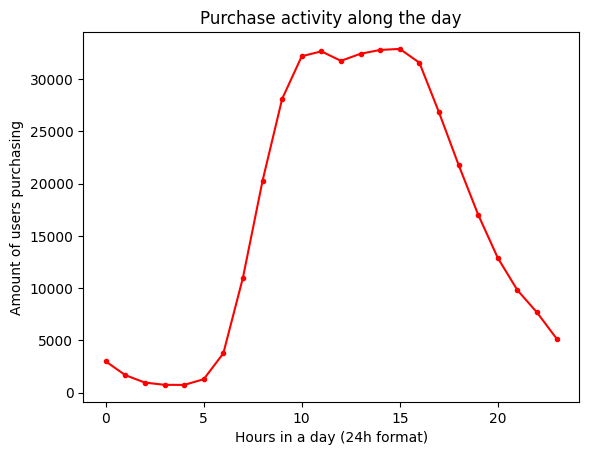

In [28]:
# Agrupación por la hora del día en la que se realiza una orden, y que nos entregue la cantidad de usuarios con el método nunique()

usersales_per_hour = df_instacarts.groupby('order_hour_of_day')['user_id'].nunique() # nunique porque cada user ID es único y nos dará el conteo de usuarios activos en cada hora del día
usersales_hour_df = usersales_per_hour.reset_index() # Al ser un Series lo que nos regresa, debemos crear un dataframe para hacer plot()

usersales_hour_df.plot(x='order_hour_of_day', y='user_id', legend=False, ylabel='Amount of users purchasing', xlabel='Hours in a day (24h format)', title='Purchase activity along the day',marker='.', color='red')
plt.show()

### Inciso 3

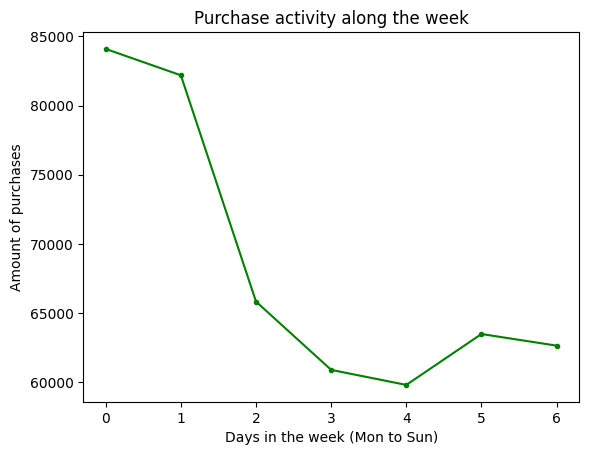

In [29]:
# Agrupación por el día de la semana en la que se realiza una orden, y que nos entregue la cantidad de órdenes con el método nunique()

usersales_per_day = df_instacarts.groupby('order_dow')['order_id'].nunique() # cada order ID es único y podremos tener su conteo por día 
usersales_day_df = usersales_per_day.reset_index() # la línea anterior regresa un objeto Series, y necesitamos un DataFrame para poder graficarlo

usersales_day_df.plot(x='order_dow', y='order_id', legend=False, ylabel='Amount of purchases', xlabel='Days in the week (Mon to Sun)', title='Purchase activity along the week',marker='.',color='green')
plt.show()

### Inciso 4

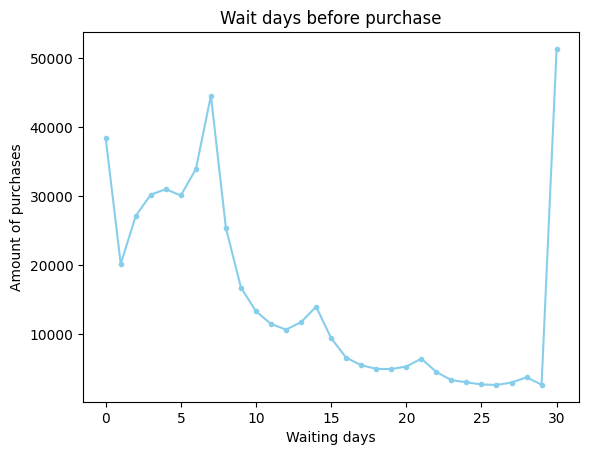

In [30]:
# Agrupación por la cantidad de días en espera antes de realizar una orden, y que nos entregue la cantidad de órdenes con el método nunique()

user_waiting_time = df_instacarts.groupby('days_since_prior_order')['order_id'].nunique() # Cada order ID es único y con el método nunique() podemos tener un conteo por día
user_waiting_time_df = user_waiting_time.reset_index() # Convertir el objeto Series a Dataframe, para poder graficarlo

user_waiting_time_df.plot(x='days_since_prior_order', y='order_id', legend=False, ylabel='Amount of purchases', xlabel='Waiting days', title='Wait days before purchase',marker='.',color='skyblue')
plt.show()

In [31]:
#Obtener el máximo de días de espera

user_waiting_time_df.max()

days_since_prior_order       30
order_id                  51337
dtype: int64

In [32]:
#Obtener el mínimo de días de espera

user_waiting_time_df.min()

days_since_prior_order       0
order_id                  2640
dtype: int64

In [33]:
#Última comprobación de máximo y mínimo de días de espera

print(df_instacarts['days_since_prior_order'].value_counts())

days_since_prior_order
30    51337
7     44577
0     38406
6     33930
4     31006
3     30224
5     30096
2     27138
8     25361
1     20179
9     16753
14    13992
10    13309
13    11737
11    11467
12    10658
15     9416
16     6587
21     6448
17     5498
20     5302
18     4971
19     4939
22     4514
28     3745
23     3337
24     3015
27     2986
25     2711
29     2673
26     2640
Name: count, dtype: int64


- Podemos observar que los datos nos permiten visualizar hasta 30 días de espera antes de realizar un pedido, probablemente existen muchos pedidos con 30 días porque la plataforma limita los días hasta ahí, es raro que existan tantos casos de tan pocos días (0 a 9) y de pronto exista un pico de 30 días para el valor máximo.
- El valor mínimo es 0 ya que hablamos de pedidos que se hacen al instante en cuanto se agregan al "carrito de compra".

## [B]

### Inciso 1

¿Hay alguna diferencia en las distribuciones de 'order_hour_of_day' en miércoles y sábados? Traza los histogramas de ambos días en el mismo gráfico y describe las diferencias que observes.

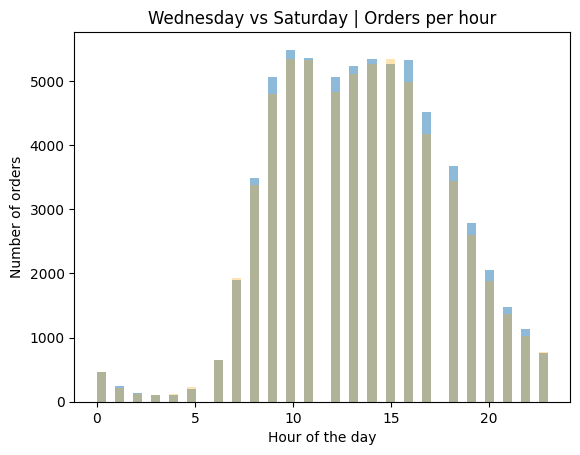

In [34]:
# Filtrar el dataframe para obtener 2 dataframes, uno de miércoles y otro de sábado

order_wednesday_df = df_instacarts[df_instacarts['order_dow'] == 2]
order_saturday_df = df_instacarts[df_instacarts['order_dow'] == 5]

# Graficar cada dataframe, con la columna de orden por día, para ver sus apariciones a lo largo del dataframe

order_wednesday_df['order_hour_of_day'].plot(x='order_hour_of_day', y='order_id', kind='hist', alpha=0.5, bins=50, xlabel='Hour of the day', ylabel='Number of orders', title='Wednesday vs Saturday | Orders per hour')
order_saturday_df['order_hour_of_day'].plot(x='order_hour_of_day', y='order_id', kind='hist', alpha=0.3, bins=50, color='orange',xlabel='Hour of the day', ylabel='Number of orders')

plt.show()

- Viendo el histograma, noto que existe poca diferencia entre ambos días en cuanto a la actividad que hay en órdenes; se parecen mucho las gráficas y hay unas ligeras diferencias donde en miércoles existen unos cuantos pedidos de más.

### Inciso 2

Traza la distribución del número de pedidos que hacen los clientes y las clientas (por ejemplo, cuántos clientes hicieron un solo pedido, cuántos hicieron solo dos, cuántos solo tres, etc.)

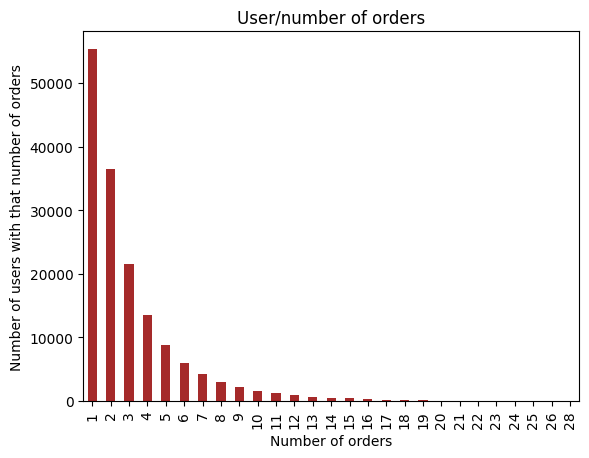

In [35]:
# Agrupación inicial para tener cuántas órdenes hizo cada usuario (user_id)

users_orders = df_instacarts.groupby('user_id')['order_id'].nunique()
users_orders_df = users_orders.reset_index() # Crear un dataframe

# Segunda agrupación según cuántas órdenes realizó cada usuario, para catalogarlos según el número de órdenes hechas

users_orders_graph = users_orders_df.groupby('order_id')['user_id'].nunique()
users_orders_graph = users_orders_graph.reset_index()

users_orders_graph.plot(kind='bar',x='order_id', y='user_id', xlabel='Number of orders', ylabel='Number of users with that number of orders', title='User/number of orders', color='brown', legend=False)

plt.show()

### Inciso 3

¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

In [36]:
df_products.head() # Listado de productos

,product_id,product_name,aisle_id,department_id
0,1,chocolate_sandwich_cookies,61,19
1,2,all-seasons_salt,104,13
2,3,robust_golden_unsweetened_oolong_tea,94,7
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1
4,5,green_chile_anytime_sauce,5,13


In [37]:
df_orders.head() # Listado de órdenes

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [38]:
# Unir los DataFrames de pedidos y productos
products_orders_df = df_orders.merge(df_products, on='product_id')

# Agrupar por product_id y contar el número de veces que aparece cada producto en las órdenes
products_orders_count = products_orders_df.groupby('product_name')['order_id'].count().reset_index()

# Cambiar nombre a las columnas para ser más claros
products_orders_count.columns = ['product_name', 'order_count']

products_orders_count = products_orders_count.sort_values(by='order_count', ascending=False)

products_orders_count.head(20)


,product_name,order_count
3251,banana,66050
3059,bag_of_organic_bananas,53297
28661,organic_strawberries,37039
25817,organic_baby_spinach,33971
27158,organic_hass_avocado,29773
25783,organic_avocado,24689
20050,large_lemon,21495
38482,strawberries,20018
20960,limes,19690
29175,organic_whole_milk,19600


- Observamos el top 20 de pedidos, encabezado por las bananas.

## [C]

### Inciso 1

¿Cuántos artículos compra la gente por lo general en un pedido? ¿Cómo es la distribución?

In [39]:
df_orders.head() # Dataframe que vamos a utilizar para esta pregunta

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


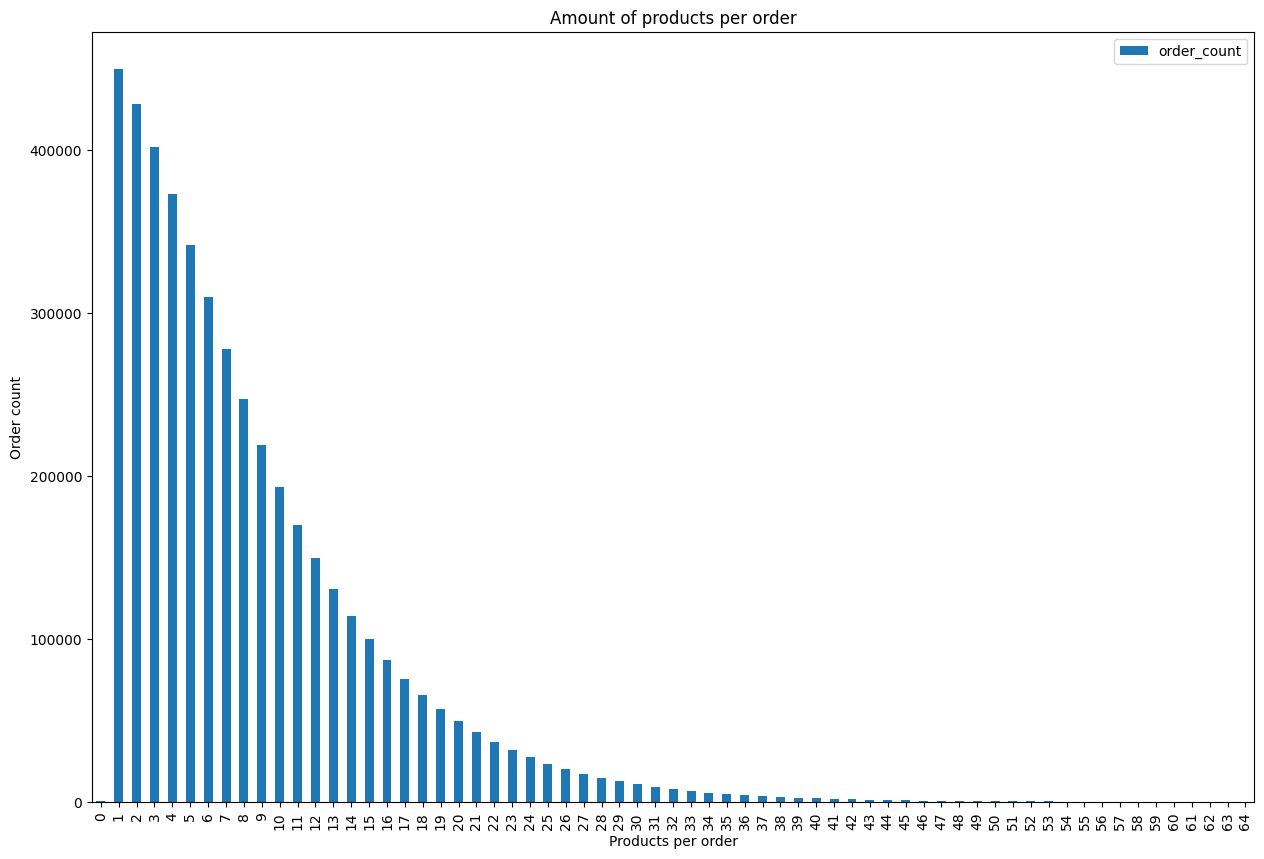

In [40]:
takeout_df = df_orders.groupby('add_to_cart_order')['order_id'].count().reset_index()

takeout_df.columns = ['products_per_order','order_count']

takeout_df.plot(kind='bar', x='products_per_order', y='order_count', figsize=[15,10], xlabel='Products per order', ylabel='Order count', title='Amount of products per order')

plt.show()

- Podemos observar que es un descenso lineal, donde la gente suele colocar pocos productos por orden, siendo pedidos de 1 producto lo que encabeza la lista.

### Inciso 2

¿Cuáles son los 20 principales artículos que se vuelven a pedir con más frecuencia (muestra sus nombres e identificaciones de producto)?


In [41]:
df_orders.head() # Primer dataframe que ocuparemos

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [42]:
df_products.head() # Segundo dataframe que ocuparemos

,product_id,product_name,aisle_id,department_id
0,1,chocolate_sandwich_cookies,61,19
1,2,all-seasons_salt,104,13
2,3,robust_golden_unsweetened_oolong_tea,94,7
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1
4,5,green_chile_anytime_sauce,5,13


In [43]:
reordered_df = df_orders.groupby('product_id')['reordered'].sum().reset_index() # Agrupamos las órdenes por producto y sumamos su 'reordered', ya que 1 es que sí lo pidieron de nuevo

reordered_named_df = reordered_df.merge(df_products, on='product_id') # Combinamos el dataframe creado con el dataframe que contiene la información de cada producto

reordered_named_df.pop('aisle_id') # Quitamos columnas extras
reordered_named_df.pop('department_id') # Quitamos columnas extras

reordered_named_df = reordered_named_df.sort_values('reordered', ascending=False) # Ordenamos el dataframe creado por valores, para mostrar cuál tiene más conteo de reordered

reordered_named_df.head(20)

,product_id,reordered,product_name
22332,24852,55763,banana
11772,13176,44450,bag_of_organic_bananas
18970,21137,28639,organic_strawberries
19660,21903,26233,organic_baby_spinach
42362,47209,23629,organic_hass_avocado
42863,47766,18743,organic_avocado
25022,27845,16251,organic_whole_milk
42739,47626,15044,large_lemon
25129,27966,14748,organic_raspberries
15037,16797,13945,strawberries


- Observamos que las bananas también encabezan el listado de productos pedidos de nueva cuenta.

### Inciso 3

Para cada producto, ¿qué proporción de sus pedidos se vuelven a pedir (crea una tabla con columnas para el ID del producto, el nombre del producto y la proporción en que se ha vuelto a comprar)?


In [44]:
products_orders_count.head() #Dataframe 1

,product_name,order_count
3251,banana,66050
3059,bag_of_organic_bananas,53297
28661,organic_strawberries,37039
25817,organic_baby_spinach,33971
27158,organic_hass_avocado,29773


In [45]:
reordered_named_df.head() #Dataframe 2

,product_id,reordered,product_name
22332,24852,55763,banana
11772,13176,44450,bag_of_organic_bananas
18970,21137,28639,organic_strawberries
19660,21903,26233,organic_baby_spinach
42362,47209,23629,organic_hass_avocado


In [46]:
ratio_product_df = products_orders_count.merge(reordered_named_df, on='product_name') # Combinar los dataframe según el nombre de producto, ya que son únicos

ratio_product_df['ratio_of_reordered'] = ratio_product_df['reordered'] / ratio_product_df['order_count'] # Crear una nueva columna haciendo la división de los valores de las otras dos

ratio_product_df.head(20) # Nos devuelve los primeros 20 valores de ratios

,product_name,order_count,product_id,reordered,ratio_of_reordered
0,banana,66050,24852,55763,0.844254
1,bag_of_organic_bananas,53297,13176,44450,0.834006
2,organic_strawberries,37039,21137,28639,0.773212
3,organic_baby_spinach,33971,21903,26233,0.772217
4,organic_hass_avocado,29773,47209,23629,0.793639
5,organic_avocado,24689,47766,18743,0.759164
6,large_lemon,21495,47626,15044,0.699884
7,strawberries,20018,16797,13945,0.696623
8,limes,19690,26209,13327,0.676841
9,organic_whole_milk,19600,27845,16251,0.829133


### Inciso 4 

¿Cuál es la proporción de productos pedidos que se vuelven a pedir para cada cliente?

In [47]:
df_instacarts.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30
1,1690866,163593,5,5,12,9
2,1454967,39980,4,5,19,2
3,1768857,82516,56,0,20,10
4,3007858,196724,2,4,12,17


In [48]:
df_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [49]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,chocolate_sandwich_cookies,61,19
1,2,all-seasons_salt,104,13
2,3,robust_golden_unsweetened_oolong_tea,94,7
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1
4,5,green_chile_anytime_sauce,5,13


In [50]:
# Conteo de pedidos por cliente

user_unique_products_df = df_instacarts.merge(df_orders, on='order_id')

order_user_products_df = user_unique_products_df.groupby('user_id')['product_id'].nunique().reset_index()

order_user_products_df

,user_id,product_id
0,2,25
1,4,2
2,5,12
3,6,4
4,7,13
...,...,...
149621,206203,27
149622,206206,17
149623,206207,33
149624,206208,80


In [51]:
# Conteo de reordenamientos por cliente

user_reorders_df = user_unique_products_df.groupby('user_id')['reordered'].sum().reset_index()

user_reorders_df

,user_id,reordered
0,2,1
1,4,0
2,5,8
3,6,0
4,7,13
...,...,...
149621,206203,6
149622,206206,15
149623,206207,41
149624,206208,87


In [52]:
# Combinación de dataframes para entregar la columna de ratio productos pedidos/reorders

order_reordered_df = order_user_products_df.merge(user_reorders_df, on='user_id') # Combinamos los dataframes creados anteriormente según su User ID

order_reordered_df['reordered_ratio'] = order_reordered_df['reordered'] / order_reordered_df['product_id'] # Realizamos la división para hacer su ratio y lo colocamos en una nueva columna

order_reordered_df.columns = ['user_id', 'product_count', 'reordered_products', 'reordered_ratio'] # Renombramos las columnas

order_reordered_df

,user_id,product_count,reordered_products,reordered_ratio
0,2,25,1,0.040000
1,4,2,0,0.000000
2,5,12,8,0.666667
3,6,4,0,0.000000
4,7,13,13,1.000000
...,...,...,...,...
149621,206203,27,6,0.222222
149622,206206,17,15,0.882353
149623,206207,33,41,1.242424
149624,206208,80,87,1.087500


### Inciso 5

¿Cuáles son los 20 principales artículos que la gente pone en sus carritos primero (muestra las identificaciones de los productos, los nombres de los productos y el número de veces que fueron el primer artículo añadido al carrito)?

In [53]:
df_products.head() # Primer Dataframe

,product_id,product_name,aisle_id,department_id
0,1,chocolate_sandwich_cookies,61,19
1,2,all-seasons_salt,104,13
2,3,robust_golden_unsweetened_oolong_tea,94,7
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1
4,5,green_chile_anytime_sauce,5,13


In [54]:
df_orders.head() # Segundo Dataframe

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [55]:
first_product_df = df_orders[df_orders['add_to_cart_order'] == 1] #Dataframe donde vemos únicamente los artículos añadidos primero al carrito

first_product_df

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
14,1961225,37553,1,1
16,639939,10017,1,1
23,750040,8518,1,0
...,...,...,...,...
4544978,1759009,46175,1,0
4544989,115427,20842,1,1
4544990,2049780,28576,1,1
4544997,2300092,10017,1,0


In [56]:
first_product_df = first_product_df.groupby('product_id')['add_to_cart_order'].sum().reset_index() # Agrupamos por ID de producto y podemos sumar porque todso están en la primera posición del carrito

first_product_df

,product_id,add_to_cart_order
0,1,47
1,2,2
2,3,5
3,4,1
4,8,4
...,...,...
26755,49687,1
26756,49688,1
26757,49690,2
26758,49691,3


In [57]:
# Combinación del dataframe creado con la información de cada producto

first_product_merge = first_product_df.merge(df_products, on='product_id')

first_product_merge = first_product_merge.sort_values('add_to_cart_order', ascending=False) # Nos entrega el dataframe donde podemos visualizar qué productos han sido más veces colocados al inicio de cada carrito

first_product_merge.pop('aisle_id') # Quitar columnas innecesarias
first_product_merge.pop('department_id') # Quitar columnas innecesarias

first_product_merge.columns = ['product_id', 'first_in_cart_count', 'product_name'] # Cambiar nombre de columnas

first_product_merge.head(20)

,product_id,first_in_cart_count,product_name
13280,24852,15562,banana
7051,13176,11026,bag_of_organic_bananas
14881,27845,4363,organic_whole_milk
11266,21137,3946,organic_strawberries
25195,47209,3390,organic_hass_avocado
11665,21903,3336,organic_baby_spinach
25485,47766,3044,organic_avocado
10507,19660,2336,spring_water
8955,16797,2308,strawberries
14955,27966,2024,organic_raspberries


# Conclusiones del proyecto

- Las horas pico de actividad, es decir, de compras por parte de los usuarios, van desde alrededor de las 9 am y hasta las 4 pm.
- A inicios de semana podemos observar que existen más compras que durante el resto de la semana.
- Contamos con la información necesaria para visualizar que el mayor tiempo de espera antes de que una persona realice una compra en algo que tiene en su carrito, es de 6 a 8 días; ahí tenemos un pico de usuarios que realizan este proceso de espera.
- Los usuarios normalmente compran 1 producto por orden, y disminuye poco a poco la cantidad de usuarios que hacen más de 1 pedido (producto) por orden.
- Los productos más populares son las bananas y las fresas, tanto en número de ventas como en número de pedidos hechos de nuevo.